### Comcast Telecom Consumer Complaints:

Q1. Import and Analysis:

    Q1. A. Import data into Python environment.
    
    Q1. B. Provide the trend chart for the number of complaints at monthly and daily granularity levels.
    
    Q1. C. Provide a table with the frequency of complaint types.

Q2. Which complaint types are maximum i.e., around internet, network issues, or across any other domains.


Q3. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

Q4. Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

       Q4. A. Which state has the maximum complaints .
        
       Q4. B. Which state has the highest percentage of unresolved complaints.

Q5. Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Q1. A.
### Import data into Python environment.

In [2]:
# Here index_col=0 is removing the 0 indexed column.
comcast_df=pd.read_csv('Comcast_telecom_complaints_data.csv',index_col=0)

In [3]:
# Display the first three rows of the dataset.
comcast_df.head(3)

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Ticket #,,,,,,,,,,
250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes


## EDA(Explanatory Data Analysis) and Cleanup the Dataset

In [4]:
# Check the null values present in the dataset(Column wise):
comcast_df.isnull().sum()

Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [5]:
# or
# To check if there is any null or not in the whole dataset:
comcast_df.isnull().values.any()

False

#### So There is no Null values in the whole dataset.
#### Also to count the scan for null value checkin in the dataset is : comcast_df.isnull().count()
# 

In [6]:
# The describe() function computes a summary of statistics pertaining to the DataFrame columns. 
# (include='all') parameter is assuring he inclusion of all column in this calculation of the function.
# 'all' : All columns of the input will be included in the output. OR we can say that Describing a column from a DataFrame by accessing it as an attribute:
comcast_df.describe(include='all')


,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,1841,91,91,2190,2,928,43,NaN,4,2
top,Comcast,24-06-15,24-Jun-15,10:18:11 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [7]:
comcast_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2224 entries, 250635 to 363614
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Customer Complaint           2224 non-null   object
 1   Date                         2224 non-null   object
 2   Date_month_year              2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 191.1+ KB


In [8]:
comcast_df.head(1)

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Ticket #,,,,,,,,,,
250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No


### Q1.B.
### Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [9]:
# Convert the 'Date_month_year' field from string object to date type object.
comcast_df['Date_month_year']=pd.to_datetime(comcast_df['Date_month_year'])
comcast_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2224 entries, 250635 to 363614
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Customer Complaint           2224 non-null   object        
 1   Date                         2224 non-null   object        
 2   Date_month_year              2224 non-null   datetime64[ns]
 3   Time                         2224 non-null   object        
 4   Received Via                 2224 non-null   object        
 5   City                         2224 non-null   object        
 6   State                        2224 non-null   object        
 7   Zip code                     2224 non-null   int64         
 8   Status                       2224 non-null   object        
 9   Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 191.1+ KB


In [10]:
# Extract the month, day from the the given field to create seperate new fields:
comcast_df['Create_Month'] = comcast_df['Date_month_year'].apply(lambda x: x.month)
comcast_df['Create_Day'] = comcast_df['Date_month_year'].apply(lambda x: x.day)

comcast_df.head(2)

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Create_Month,Create_Day
Ticket #,,,,,,,,,,,,
250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22
223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4


In [11]:
# To get the date wise day of the weeek for the field named 'Create_Days_of_Week'
comcast_df['Create_Days_of_Week']=comcast_df['Date_month_year'].dt.day_name()

# Change the 'Create_Month' field from number to name:
comcast_df['Create_Month']= comcast_df['Date_month_year'].dt.month_name()

comcast_df.head(3)

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Create_Month,Create_Day,Create_Days_of_Week
Ticket #,,,,,,,,,,,,,
250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,22,Wednesday
223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August,4,Tuesday
242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,18,Saturday


In [12]:
# Find the number of complaints Monthly and Plot:

Text(0.5, 1.0, 'Monthly Complaints Report ')

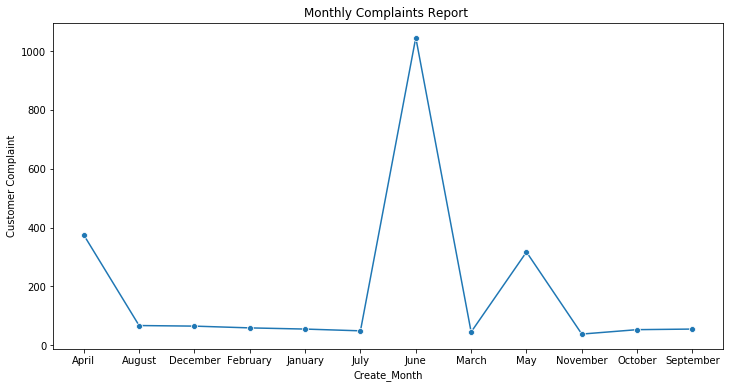

In [13]:
# Apply plotting using Seaborn:
plt.figure(figsize=(12,6))
Group_by_Month=comcast_df.groupby('Create_Month').count().reset_index()

Comp_M_Plot = sns.lineplot(x='Create_Month', y= 'Customer Complaint', data = Group_by_Month, marker='o')
Comp_M_Plot.set_title("Monthly Complaints Report ")

Text(0.5, 1.0, 'Daily Complaints Report ')

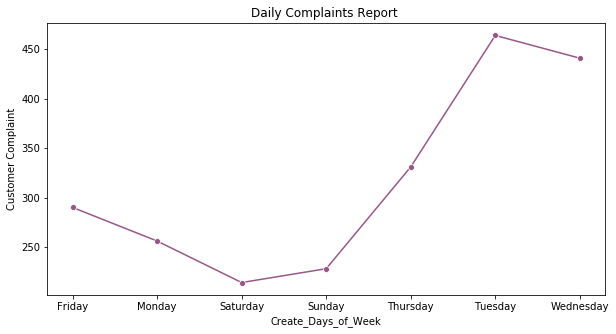

In [14]:
plt.figure(figsize=(10,5))
Group_by_Day=comcast_df.groupby('Create_Days_of_Week').count().reset_index()
#Group_by_Day['Create_Day']=Group_by_Day['Date_month_year'].dt.day_name()
Comp_D_Plot = sns.lineplot(x='Create_Days_of_Week', y= 'Customer Complaint', data = Group_by_Day, marker='o', color='#965786')

Comp_D_Plot.set_title("Daily Complaints Report ")



## Conclusion:------- Tuesday and Wednesday is having maximum complaints report.

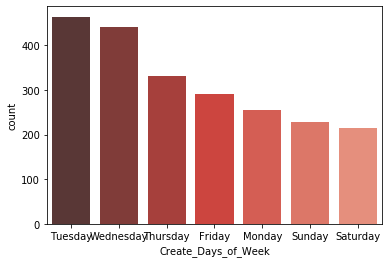

In [15]:
# OR We can use another way to represent the daily complaints report:
sns.countplot(x='Create_Days_of_Week', data = comcast_df,
              order=comcast_df['Create_Days_of_Week'].value_counts().index, palette ="Reds_d")

## Above is the Daily Complaints Status.

### Q1.C.
### Provide a table with the frequency of complaint types.

In [16]:
comcast_df['Customer Complaint'] = comcast_df['Customer Complaint'].str.title()
Comp_freq_Table = comcast_df['Customer Complaint'].value_counts()
Comp_freq_Table

Comcast                                                             102
Comcast Data Cap                                                     30
Comcast Internet                                                     29
Comcast Data Caps                                                    21
Comcast Billing                                                      18
                                                                   ... 
Comcast Deceving Upgrade Without Request                              1
Comcast Overcharge                                                    1
Comcast Trial Of Putting Cap (300 Gb / Month) On Internet Usage.      1
Comcast Unfair Charge                                                 1
Comcast - Issues Galore                                               1
Name: Customer Complaint, Length: 1740, dtype: int64

In [17]:
import nltk
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### Q2.
### Which complaint types are maximum i.e., around internet, network issues, or across any other domains?


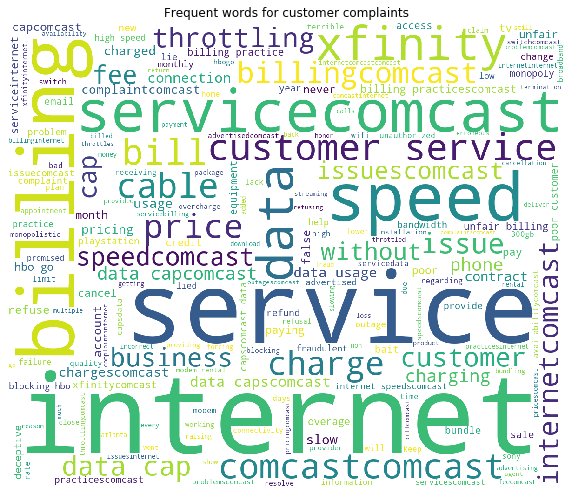

In [18]:
from wordcloud import WordCloud, STOPWORDS
common_complaints = comcast_df['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()

list_to_stops = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')

for word in list_to_stops:
    STOPWORDS.add(word)

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(common_complaints)

plt.figure( figsize=(10,12) )
plt.imshow(wordcloud)
plt.title('Frequent words for customer complaints')
plt.axis('off')
plt.show()

## Conclusion:---------- As per the table of complaints word frequency 'internet' complaints is maximum.

In [32]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

nltk.download('wordnet')


def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized


doc_complete = comcast_df['Customer Complaint'].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]



import gensim
from gensim import corpora

dictionary = corpora.Dictionary(doc_clean)
dictionary

doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix


from gensim.models import LdaModel

num_topic = 9
ldamodel = LdaModel(doc_term_matrix,num_topics=num_topic,id2word = dictionary,passes=10)

topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()
    
    
word_dict = {}
for i in range(num_topic):
    words = ldamodel.show_topic(i,topn = 20)
    word_dict['Topic '+"{}".format(i)]=[i[0] for i in words]
    
pd.DataFrame(word_dict)


import pyLDAvis.gensim

Lda_display = pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dictionary,sort_topics=False)
pyLDAvis.display(Lda_display)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Administrator/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Administrator\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [20]:
comcast_df.head(3)

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Create_Month,Create_Day,Create_Days_of_Week
Ticket #,,,,,,,,,,,,,
250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,22,Wednesday
223441,Payment Disappear - Service Got Disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August,4,Tuesday
242732,Speed And Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,18,Saturday


### Q3.
### Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [21]:
comcast_df['New_Comp_Status'] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in comcast_df["Status"]]


comcast_df['New_Comp_Status'].unique()

array(['Closed', 'Open'], dtype=object)

In [22]:
comcast_df.head(3)

,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Create_Month,Create_Day,Create_Days_of_Week,New_Comp_Status
Ticket #,,,,,,,,,,,,,,
250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,22,Wednesday,Closed
223441,Payment Disappear - Service Got Disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August,4,Tuesday,Closed
242732,Speed And Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,18,Saturday,Closed


## Conclusion: ------- New Categorical variable created with the values 'Closed' and 'Open'.

### Q4.
### Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

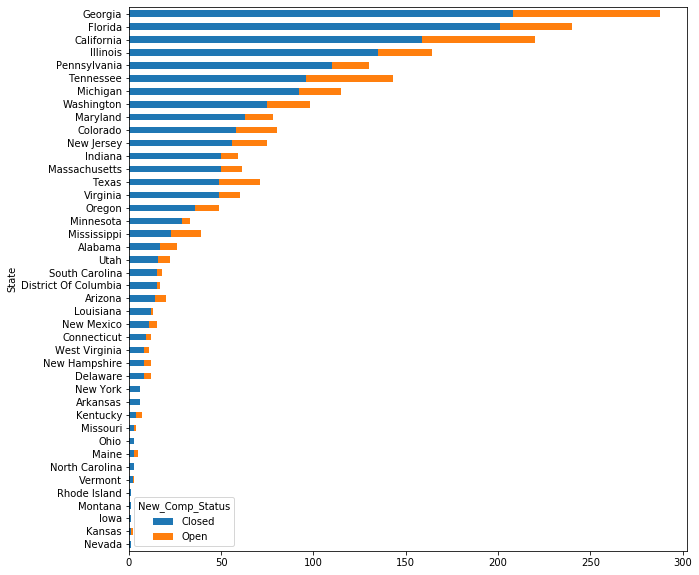

In [23]:
comcast_df['State'] = comcast_df['State'].str.title() 
st_comp = comcast_df.groupby(['State','New_Comp_Status']).size().unstack().fillna(0)

st_comp

st_comp.sort_values('Closed',axis = 0,ascending=True).plot(kind="barh", figsize=(10,10), stacked=True)

### Q.4. A.
### Which state has the maximum complaints? [Provide Insight]


In [24]:

Comp_max=comcast_df.groupby(["State"]).size().sort_values(ascending=False).to_frame().rename({0: "Complaint count"}, axis=1)[:5]
Comp_max


,Complaint count
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143


## Conclusion: ------- Georgia has highest complaints [Insight below]

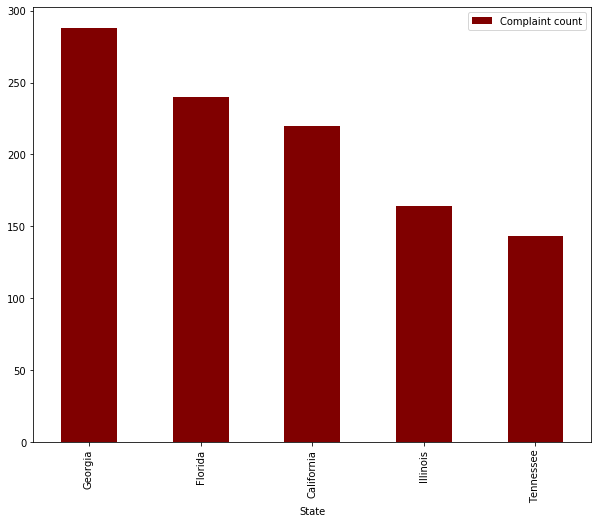

In [25]:
Comp_max.plot(kind="bar", figsize=(10,8), stacked=True, color='maroon')

In [26]:
Comp_Status = comcast_df.groupby(['State','New_Comp_Status']).size().unstack().fillna(0)
Comp_Status.sort_values('Closed',axis = 0,ascending=False)[:1]



New_Comp_Status,Closed,Open
State,,
Georgia,208.0,80.0


### Q.4. B.
### Which state has the highest percentage of unresolved complaints [Provide Insight]

In [27]:
#highest percentage of unresolved complaints
Comp_Status['Resolved_cmp_prct'] = Comp_Status['Closed']/Comp_Status['Closed'].sum()*100
Comp_Status['Unresolved_cmp_prct'] = Comp_Status['Open']/Comp_Status['Open'].sum()*100
Comp_Status.head(3)

New_Comp_Status,Closed,Open,Resolved_cmp_prct,Unresolved_cmp_prct
State,,,,
Alabama,17.0,9.0,0.995899,1.740812
Arizona,14.0,6.0,0.820152,1.160542
Arkansas,6.0,0.0,0.351494,0.000000


In [28]:
C_Unresolved=Comp_Status.sort_values('Unresolved_cmp_prct',axis = 0,ascending=False)[:5]
C_Unresolved


New_Comp_Status,Closed,Open,Resolved_cmp_prct,Unresolved_cmp_prct
State,,,,
Georgia,208.0,80.0,12.185120,15.473888
California,159.0,61.0,9.314587,11.798839
Tennessee,96.0,47.0,5.623902,9.090909
Florida,201.0,39.0,11.775044,7.543520
Illinois,135.0,29.0,7.908612,5.609284


## Conclusion: -------- Georgia state has highest Unresolved complaints when compared to other states.

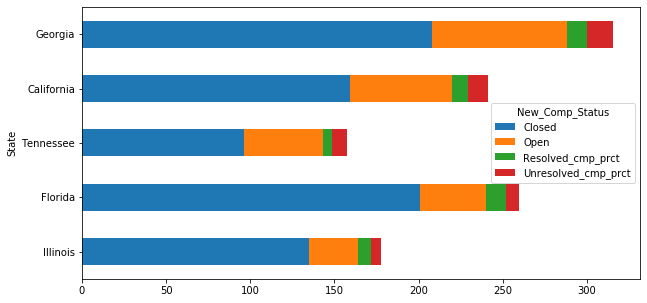

In [29]:
C_Unresolved.sort_values('Unresolved_cmp_prct',axis =0, ascending=True).plot(kind='barh',figsize=(10,5),stacked=True)

### Q.5.
### Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [30]:

Comp_Resolved = comcast_df.groupby(['Received Via','New_Comp_Status']).size().unstack().fillna(0)
Comp_Resolved['resolved'] = Comp_Resolved['Closed']/Comp_Resolved['Closed'].sum()*100
Comp_Resolved['resolved']


Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64

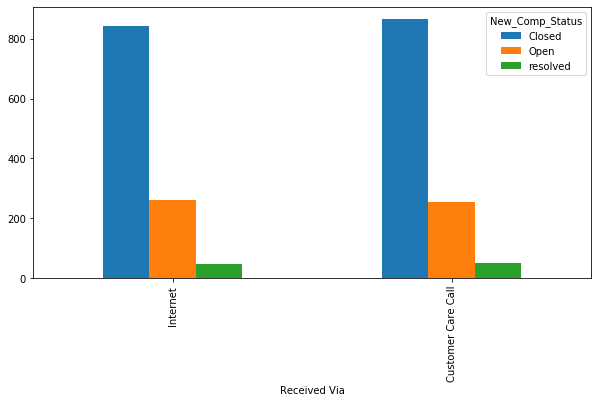

In [31]:
Comp_Resolved.sort_values('resolved',axis =0, ascending=True).plot(kind='bar',figsize=(10,5),stacked=False)

##############################################################                   Thank You                      ##########################################################
# 